# CS 8321 Lab 1
## Authors:
Daniel Canon Ellis, Timothy Lee, Joshua Sylvester

# 1. Overview
We will be investigating bias among popular word embeddings (GloVe-6b, GloVe-840b, and ConceptNet-Numberbatch) in the application domain of sentiment analysis. Specifically, we will be investigating whether or not these word embeddings contain bias (positive or negative) toward the names of countries. We will be grouping these country names based on their varying degrees of economic status as designated by the World Bank during the analysis [[1]](https://worldpopulationreview.com/country-rankings/low-income-countries).


Our goal is NOT to establish whether or not any positive or negative sentiment bias associated with a country's name is directly caused by the country's economic ranking, there are a myriad of factors that could have caused such a relationship to occur in the various text embeddings. Our goal is simply to establish whether or not such a relationship exists and the implications that it could have.


Bias in machine learning can have far-reaching and often unforseen consequences. It is of upmost importance that researchers understand the biases that their models are prone to and the biases that models are learning from the training data. Awareness of such biases means potential issues can be handled premptively or limitations on a model's use cases can be put in place. Otherwise there could be downstream impacts that, when undetected, could have detrimental impacts on society and inequality.


Consider the following hypothetical example with regards to our investigation concerning country names. Let us suppose that a bias exists in a machine learning model with a text-embedding component where the names of countries with lower economic rankings have a more negative sentiment than the names of countries from a higher economic category. Let us further suppose that this model is being used in production at a major bank that specializes in providing infrastructure development loans to countries. In our hypothetical scenario, this machine learning model is being used to generate memos that summarize the various loan applications and argue for or against moving forward with them. These generated memos will be provided to different decision makers in the bank who will decide which applications to approve.


If a country has a lower economic standing, then the summary and arguments generated by the model could have a more negative tone. This country's approval chances were most likely already low due to it's empircal numbers alone. Now in addition to this, the machine-learning-generated-memo being used to influence the loan decision could contain a more negative tone. This puts the country in an even less likely position to get approved for the infrastructural development loan. Such a scenario could deny a lower income country the opportunity it needs to help its people and the economic divide between higher and lower income countries could be further deepened.


The implications of such a bias could be further extended to areas such as policy-making or humitarian aid to name a few. If such a bias exists in the text embeddings used to develop machine learning models, researchers should be aware of it so that they can better prevent the models from perpetuating economic inequality on a global stage.

# 2. Research Questions

> **Question 1)** Does sentiment bias exist in popular embeddings (Glove-840b and GloVe-6b) when analyzing the sentiment associated with the names of countries of varying economic standings specified by the World Bank (low, lower-middle, upper-middle, high)? We will be using the ANOVA Test and the Kolmogorov-Smirnov tests to establish whether statistically significant differences in sentiment exist for the countries across the different economic categories.

>**Hypothesis 1)** We hypothesize that country-name sentiment bias will exist when using the GloVe-840b and GloVe-6b embeddings. Furthermore, we hypothesize the names of countries of lesser economic standing will have a more negative sentiment bias than those of higher economic standing.

>**Question 2)** If our hypothesis to research question number 1 proves correct, we will also investigate the following:
Does ConceptNet Numberbatch mitigate or worsen sentiment bias among different country names which are grouped by their economic status compared to the older GloVe-840b and GloVe-6b embeddings? We will be using the ANOVA Test and the Kolmogorov-Smirnov tests to establish whether statistically significant differences in sentiment exist for the countries across the different economic categories.

>**Hypothesis 2)** If sentiment bias is revealed as a part of the investigation of research question 1, we hypothesize that the ConceptNet Numberbatch embedding will mitigate this sentiment bias.


# 3. Methodology / Experiment Overview:

## 3.1 Model Training
In order to answer these questions we will be conducting three experiments, one for each embedding (GloVe-6b [[3]](https://github.com/stanfordnlp/GloVe), GloVe-840b [[3]](https://github.com/stanfordnlp/GloVe), ConceptNet-Numberbatch [[4]](https://github.com/commonsense/conceptnet-numberbatch)). In each experiment we will be training an SGDClassifier using Logisitic Regression on a vectorized version of Bing Liu's sentiment lexicon [[2]](https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html). In each experiment the vectorized version of the lexicon will be generated using the experiment's designated word embedding.

## 3.2 Country-Name Dataset
### 3.2.1 Country-Name Dataset Description
We will be organizing the names of countries based on four economic categories (high income, upper-middle income, lower-middle income, and low income). The World Bank routinely issues guidance on how to classify a country's economy based on these categories. It uses the Gross National Income (GNI) to do so. GNI is essentially a way to measure a countries income [[5]](https://www.investopedia.com/terms/g/gross-national-income-gni.asp).


The following breakdown was found at [[1]](https://worldpopulationreview.com/country-rankings/low-income-countries).
<br>
**2022-2023 World Bank Country Lending Group guidelines (all values USD):**
- Low-income economies - 2021 GNI per capita of up to \$1,085
- Lower-middle-income economies - 2021 GNI per capita of \$1,086 to \$4,255
- Upper-middle-income economies - 2021 GNI per capita of \$4,256 to \$13,205
- High-income economies - 2021 GNI per captia of \$13,206 or more


We retrieved table-formatted data of country economies organized by these income categories at Wikipedia [[6]](https://en.wikipedia.org/wiki/List_of_countries_by_GNI_(nominal)_per_capita) which cited that that the raw data came directly from the World Bank [[7]](https://data.worldbank.org/indicator/ny.gnp.pcap.cd?year_high_desc=true).

### 3.2.2 Country-Name Dataset Preprocessing

In each experiment we will be taking the countries in each of the economic-income categories and vectorizing their names with the given experiment's embedding. Countries which have names consisting of multiple words will be concatenated with an underscore. For example, "United States" will become "United_States". We do this instead of simply averaging the vectors for the words "United" and "States" so the meaning associated with these country names will be better perserved. Some concatenated versions of country names do not exist in some embeddings, in that case we drop the country rather than potentially using an averaged vector which might not represent the country name as well. We chose to live with dropping these countries from the dataset, as most countries concatenated names existed, especially for the bigger embeddings. Future work could extend our approach so that when a concatenated country name doesn't exist, something like the nationality (which tends to be one word) could be used instead.


## 3.3 Evaluation Methodology
### 3.3.1 Evaluation Overview

For each experiment, the resulting vectors of country names will be passed through the experiment's trained SGDClassifer and the resulting country-name-sentiments will be recorded and organized into 4 different distributions based on the economic category of the corresponding country name.

The country-name-sentiment distributions for each economic category will be plotted in seaborn swarm plots and bar plots for visual inspection. In addition to visual inspection, we will be using the ANOVA Test and Kolmogorov-Smirnov Tests to analyze statistical differences between each of these distributions.


### 3.3.2 ANOVA TEST

The ANOVA Test is useful because it can be used for testing two or more groups, in our case we have four groups. Specifically, the ANOVA tests two or more groups with the null hypothesis that the group population means are the same [[8]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html). The ANOVA Test requires three assumptions. The populations that the samples are pulled from are 1) normal and 2) have equal variances. The 3rd assumptions is as follows: "The observations in each group are independent of each other and the observations within groups were obtained by a random sample" [[8]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)[[9]](https://www.statology.org/anova-assumptions/). Assumptions 1 and 2 will be tested and discussed for each trial later in this notebook using the Shapiro-Wilk Test and Brown-Forsynth tests respectively. However, it's important to note up front that assumptions 1 and 2 are flexible and violations to them do not necessary invalidate the results of the ANOVA test [[9]](https://www.statology.org/anova-assumptions/)[[10]](https://online.stat.psu.edu/stat500/lesson/10/10.2/10.2.1). Assumption 3 on the other hand is more steadfast and it's quite possible we will be violating it.


What follows is a discussion about the assumptions of the ANOVA test and how we are addressing them. Addressing these assumptions is complicated. Based on our following discussion we believe that we *could be* justified in continuing on with the ANOVA test. Ultimately the ANOVA test is one of the only options so we were going to use it even if we don't perfectly meet the assumptions.


The **TLDR** is that we are treating each economic grouping of country sentiments as it's own population and we are not randomly sampling from it. Additionally, we are assuming that each country's name's sentiment is independent of the others.


Notice that **ANOVA Test assumptions 1 and 2** are with regards to the normalcy and variances of the populations, not the samples. So we must define what the population is for our data. For simplicity, we will conduct the following disucssion with regards to a single model and single embedding.


After the groups of vectorized country names are passed into the model, each country name has a predicted sentiment. Each of these groups of sentiments could be considered the samples, in that case the population could be considered either 1) the sentiments for all words in the embedding or 2) the sentiments for all countries. However, we didn't really think either of these explanations made sense for our experiment.


Instead, we make the assumption that the economic categorized distributions of country-name-sentiments are themselves the populations. This allows us to align our groups of data more closely to the motivation behind the ANOVA Test because the ANOVA test assumes that your samples each came from a different population.


Now, we deviate from the premise of the ANOVA test in that we are *not* going to sample from these populations, instead we will use the population distributions themselves. This deviation was made because randomly sampling from the different group populations meant data would need to be left out and comparing populations seemed like it would provide a better picture of the relationships between the economic categories.


Therefore, with regards to ANOVA Test assumptions 1 and 2 we will be performing the normal distribution tests and equal variances tests on each individual economic categorized country-name-sentiment distribution for a given experiment.


For **ANOVA Test Assumption 3** the two conditions are 1) that the obtained observations are independent and 2) collected via random sample. We've already already discussed above our rational in handling the random sample requirement and we apply that same rational here.


The independent observations requirements presents an interesting dilemna. Are these observations independent of one another? The countries were initially chosen based on their GDI, so is one country's GDI dependent on any other country's GDI? The answer is complicated. Do those countries trade with one another? Do they have embargos against each other? Is one country responsible for distributing loans to another? However, are those really the right questions? Afterall, the observations in our distributions are sentiments, not GDIs.


Is a country's name's sentiment independent of another country's name's sentiment? Well to a certain extent that's the exact question we are trying to answer with our research at hand. Intuitively, though you would think certain countries' names' vectors from an embedding would be closely associated based on their economic ranking, military alliances, ethnic similarities, or geography. However, in a perfect world, one would hope the sentiments with these vectors are independent. That each country determines its own destiny so to speak. Under that notion, we make the leap (and we acknowledge that it is a big leap) to say that each country-name's sentiment is independent of the others.


Through a lot of leaps we think that we can justify performing ANOVA test. However, because we are making these leaps we wanted to add an additional statistical test to further affirm whatever results we may get from the ANOVA test. We found a great blog post about a variety of statistical tests [[11]](https://towardsdatascience.com/how-to-compare-two-or-more-distributions-9b06ee4d30bf), and from it we found the 2-sample Kolmogorov-Smirnov Test.


### 3.3.3 Kolmogorov-Smirnov Test

As the name states, the 2-sample Kolmogorov-Smirnov Test can only be used to compare two samples. So we choose to use it to compare the low-income and high-income country-name-sentiment distributions for each experiment. The results of this test will only allow us to draw conclusions about a subset of our research questions, i.e. high-income vs. low-income; however, the takeways are still directly related to the motivation discussed in our overview.


The Kolmogorov-Smirnov test uses the maximum absolute difference between two group's cumulative distributions to asses whether the two group's originate from the same (or identical) populations [[12]](https://towardsdatascience.com/kolmogorov-smirnov-test-84c92fb4158d)[[13]](https://influentialpoints.com/Training/kolmogorov-smirnov_test-principles-properties-assumptions.htm). We had a hard time finding a consistent set of assumptions among references which must be satisified to perform the test. However, the general consensus seemed to be that the test perform best when the distributions are continuous, which shouldn't be a problem in our case because the country-name-sentiment distributions are on a continous scale. Additionally, some references allude to the data needing to be randomly sampled and independent [[13]](https://influentialpoints.com/Training/kolmogorov-smirnov_test-principles-properties-assumptions.htm). We've already discussed our logic with regards to the random sampling and independence requirements of the ANOVA test and we apply that same logic here.

# 4. Setup

### Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn
import re
import scipy.stats as stats


from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Google Drive Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

base_dir = '/content/drive/MyDrive/School/CS 8321/Lab 1/' # Josh
# base_dir = # Canon
# base_dir = # Tim

Mounted at /content/drive


### Load Embeddings

In [ ]:
%%time
# Larson code
def load_embeddings(filename):
    """
    Load a DataFrame from the generalized text format used by word2vec, GloVe,
    fastText, and ConceptNet Numberbatch. The main point where they differ is
    whether there is an initial line with the dimensions of the matrix.
    """
    labels = []
    rows = []
    with open(filename, encoding='utf-8') as infile:
        for i, line in enumerate(infile):
            items = line.rstrip().split(' ')
            if len(items) == 2:
                # This is a header row giving the shape of the matrix
                continue
            labels.append(items[0])
            values = np.array([float(x) for x in items[1:]], 'f')
            rows.append(values)

    arr = np.vstack(rows)
    return pd.DataFrame(arr, index=labels, dtype='f')

# v19.08 https://github.com/commonsense/conceptnet-numberbatch
# embeddings = load_embeddings(base_dir + 'Embeddings/numberbatch-en.txt')
# embeddings.shape

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 11.9 µs


### Load Lexicon

In [ ]:
# Larson Code
def load_lexicon(filename):
    """
    Load a file from Bing Liu's sentiment lexicon
    (https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html), containing
    English words in Latin-1 encoding.

    One file contains a list of positive words, and the other contains
    a list of negative words. The files contain comment lines starting
    with ';' and blank lines, which should be skipped.
    """
    lexicon = []
    with open(filename, encoding='latin-1') as infile:
        for line in infile:
            line = line.rstrip()
            if line and not line.startswith(';'):
                lexicon.append(line)
    return lexicon

pos_words = load_lexicon(base_dir + 'opinion-lexicon-English/positive-words.txt')
neg_words = load_lexicon(base_dir + 'opinion-lexicon-English/negative-words.txt')

print(len(pos_words), len(neg_words))

2006 4783


### Helper Functions for text embedding interaction

In [ ]:
# Larson Code
def vecs_to_sentiment(vecs):
    # predict_log_proba gives the log probability for each class
    predictions = model.predict_log_proba(vecs)

    # To see an overall positive vs. negative classification in one number,
    # we take the log probability of positive sentiment minus the log
    # probability of negative sentiment.
    # this is a logarithm of the max margin for the classifier,
    # similar to odds ratio (but not exact) log(p_1/p_0) = log(p_1)-log(p_0)
    return predictions[:, 1] - predictions[:, 0]

# Larson Code
def words_to_sentiment(words):
    vecs = embeddings.loc[words].dropna()
    log_odds = vecs_to_sentiment(vecs)
    return pd.DataFrame({'sentiment': log_odds}, index=vecs.index)

In [ ]:
# Larson Code
import re
TOKEN_RE = re.compile(r"\w.*?\b")
# The regex above finds tokens that start with a word-like character (\w), and continues
# matching characters (.+?) until the next word break (\b). It's a relatively simple
# expression that manages to extract something very much like words from text.

# Larson Code
def text_to_sentiment(text):
    # tokenize the input phrase
    tokens = [token.casefold() for token in TOKEN_RE.findall(text)]
    # send each token separately into the embedding, then the classifier
    sentiments = words_to_sentiment(tokens)
    return sentiments['sentiment'].mean() # return the mean for the classifier

# 5. Preprocessing: Country-Name Dataset Setup & Cleaning Funcs

### Source
Data retrieved from : [[6]](https://en.wikipedia.org/wiki/List_of_countries_by_GNI_(nominal)_per_capita) [[7]](https://data.worldbank.org/indicator/ny.gnp.pcap.cd?year_high_desc=true).


### Manual Cleaning
- Built our own excel spreadsheet with a column for each economic-income category from the tables at [[6]](https://en.wikipedia.org/wiki/List_of_countries_by_GNI_(nominal)_per_capita)
- Modified some names to strip things like the colonizer / territory-owner from the country names. For example: "Greenland (Denmark)" --> "Greenland".


### Programmatic Cleaning
The programmatic cleaning will happen below.
- `combine_words(temp)`. We will be combining country names with multiple words in their name. We will be using an underscore for concatenation because that seemed to produce reliable matches in the embedding. For example, "United States" --> "United_States". You will later see that the GloVe-6b embedding handled this the worst.
- Conceptnet had all of the words in lower case while the GloVe embeddings had a mix of casings. We try several different variations of a countries name to find it in the embedding before disregarding it `remove_nans_and_dne(countries_arr, level, verbose`). We start by checking for the first letter of each word in a name being capitalized, for example: "United_States". Then we check all lower case, for example: "united_states". Then lastly we check all upper case, for example: UNITED_STATES". This method could be improved upon but we found that this was a fairly reliable way to find matches in the embeddings.

In [ ]:
# Helper Function for combining counties with multiple words with an underscore
def combine_words(temp):
    if temp is np.nan:
        return np.nan
    temp = "_".join( temp.split() )
    return temp

# Helper Function for removing nans from the dataframe
# and
# remove countries that don't exist in embedding
def remove_nans_and_dne(countries_arr, level, verbose):
    # remove nans that are inherently a part of dataframe because of how we set
    # up the dataset for intake
    new_countries = []
    for country in countries_arr:
        if (isinstance(country, str)):
            new_countries.append(country)

    # figure out the correct casing of the country names to use, and disregard
    # if no match in the current embedding
    countries_that_exist = []
    for country in new_countries:
        if (country in embeddings.index): # check normal english casing
            countries_that_exist.append(country)
        elif (country.lower() in embeddings.index): # check all lower case
            countries_that_exist.append(country.lower())
        elif (country.upper() in embeddings.index):
            countries_that_exist.append(country.upper()) # check all upper case
        elif(isinstance(country, str) and verbose==1):
            print(level + " country " + country + " did not exist in embedding")

    return countries_that_exist

# Adapted from Larson Code
def load_economic_designation_dict(verbose):
    # Load in the countries and combine countries with multiple words
    countries = pd.read_excel(base_dir + "Data/Countries.xlsx")
    countries["high"] = countries["high"].apply(combine_words)
    countries["upper_middle"] = countries["upper_middle"].apply(combine_words)
    countries["lower_middle"] = countries["lower_middle"].apply(combine_words)
    countries["lower"] = countries["lower"].apply(combine_words)

    # Remove countries that DNE in current embedding
    if (verbose):
        print("\n-------------------------------- LABELS THAT DO NOT EXIST --------------------------------\n")
    high_countries = remove_nans_and_dne(countries["high"].values, "high", verbose)
    upper_middle_countries = remove_nans_and_dne(countries["upper_middle"].values, "upper_middle", verbose)
    lower_middle_countries = remove_nans_and_dne(countries["lower_middle"].values, "lower_middle", verbose)
    lower_countries = remove_nans_and_dne(countries["lower"].values, "lower", verbose)
    print()

    # Create a dictionary in the format Larson used for names separated by race
    COUNTRIES_BY_ECONOMIC_DESIGNATION = {
        "high": high_countries,
        "upper_middle": upper_middle_countries,
        "lower_middle": lower_middle_countries,
        "lower": lower_countries
    }
    return COUNTRIES_BY_ECONOMIC_DESIGNATION

# Adapted from Larson Code
def get_sentiment_table(task, verbose):
    if (task == "economic_designations"):
        dictionary = load_economic_designation_dict(verbose)

    frames = []
    for group, country_list in sorted(dictionary.items()):
        countries = [country for country in country_list] # did this because i was too lazy to check if country_list is np array or list and check if it mattered
        sentiments = words_to_sentiment(countries)
        sentiments['group'] = group
        frames.append(sentiments)

    # Put together the data into one big table
    return pd.concat(frames)

## 6. Experiment Code
### Statistical Test Helper Funcs
We liked the setup Dr. Larson / Dr. Speer had where they had a single function which loads the embedding, vectorizes the sentiment lexicon, trains the model, then evaluates the results. So we decided to add a few  more steps to that function for testing the various assumptions for our statistical tests. This next code block is where we define those steps.


`normal_data_check(country_sentiments, labels)` is done to satisify ANOVA test assumption 1. It will take the country-name-sentiments table and check whether each economic categorized country-name-sentiment distribution is a normal distribtion using the Shapiro-Wilk Test and also plotting the distribution histograms. We also perform one iteration of the test where we combine all of the data across all economic categories, we did this because of our flexible definition of "population" and looking at this chart could be useful if we changed the defintion of "population" to be "all country-name-sentiments" (ultimately we didn't do that but it was still an insightful figure to include). For each iteration of the test we will plot the histogram with the corresponding Shapiro-Wilk pvalue as a label in the legend.


Note that the Shapiro-Wilk Test tests the null hypothesis that the sample came from a normal distribution [[14]](https://towardsdatascience.com/a-practical-introduction-to-the-shapiro-wilk-test-for-normality-5675e52cee8f). (Recall we have defined each distribution as its own population so that's why we are checking each distribution itself for normality).


`variance_checking(country_sentiments, labels):` is done to satisify ANOVA test assumption 2. We use the Brown-Forsynth Test to test for equal variances. [[15]](https://www.statology.org/brown-forsythe-test-in-python/)[[16]](https://www.geeksforgeeks.org/how-to-perform-a-brown-forsythe-test-in-python/). We actually use the Levene function from the scipy.stats package, but Brown-Forsynth is just Levene but using the median instead of the mean [[17]](https://en.wikipedia.org/wiki/Brown–Forsythe_test). Additionally, we include code to check if the largest variance is not larger than 4 times the smallest variance, in which case a rejection of the null hypothesis that the variances are not equal is acceptable because the one_way ANOVA test is "robust to unequal variances" [[18]](https://www.statology.org/brown-forsythe-test-in-python)


`do_stats(country_sentiments, task)` will be used to call the two previous mentioned function and then perform the one way ANOVA test and the 2-sample Kolmogorov-Smirnov test. It will also plot the cumulative distribution function of the high-income and low-income country-name-sentiment distributions which correspond to the distributions used by the Kolmogorov-Smirnov test.


In [ ]:
from pandas.core.groupby.groupby import F

def normal_data_check(country_sentiments, labels):
    print("\n-------------------------------- ASSUMPTION 1: DATA COMES FROM NORMAL DISTRIBUTION --------------------------------\n")
    # 5 subplots (1 for each economic categorized country-name-sentiment distrubtion
    # and 1 for combining all of the country-name-sentiments into a single distribution)
    f, axarr = matplotlib.pyplot.subplots(1, 5)
    f.suptitle("Distribution Histograms with Shapiro-Wilk pvalue", fontsize=16)
    f.set_size_inches(18, 6)

    print("Using Shapiro-Wilk Test to check if data comes from a normal distribution. Plots shown below as first row of plots")

    pvalues = []
    # Loop over the economic categories
    for i, label in enumerate(labels):
        series = country_sentiments['sentiment'][country_sentiments['group'] == label].value_counts(bins = 8, sort=False) # bins of 8 chosed arbitrarily
        shapiro_test = stats.shapiro(country_sentiments['sentiment'][country_sentiments['group'] == label]) # test to establish if data comes from normal distribution

        print("Shapiro-Wilk Test for " + label + "'s pvalue is " + str(round(shapiro_test.pvalue, 3)))

        indices = series.index
        labels = []
        for index in indices:
            labels.append(str(index))
        # Plot the distriubtion with it's corresponding shapiro pvalue
        axarr[i].bar(labels, series, label="shapiro_pvalue: " + str(round(shapiro_test.pvalue, 3)))
        axarr[i].legend()
        axarr[i].tick_params(labelrotation=45)
        axarr[i].set_title(label)

        pvalues.append(shapiro_test.pvalue)

    # Check the null hypothesis
    reject = True
    for pvalue in pvalues:
        if (pvalue < 0.05):
            print("\nAt least one distribution has a pvalue of 0.05; therefore the null hypothesis should be rejected.")
            print("ASSUMPTION 1 NOT SATISIFIED")
            print("However, it is possible to continue ANOVA test without satisfying assumption 1")
            break

    if (not reject):
        print("ASSUMPTION 1 SATISFIED")

    # Plot the combination of all country-name-sentiments as a single distriubtion
    series = country_sentiments['sentiment'].value_counts(bins = 8, sort=False) # arbitrarily chose 8 for the number of bins
    shapiro_test = stats.shapiro(country_sentiments['sentiment']) # test to establish if data comes from normal distribution

    indices = series.index
    labels = []
    for index in indices:
        labels.append(str(index))
    axarr[4].bar(labels, series, label="shapiro_pvalue: " + str(round(shapiro_test.pvalue, 3)))
    axarr[4].legend()
    axarr[4].tick_params(labelrotation=45)
    axarr[4].set_title("Combining data from all distributions")


    f.show()

def variance_checking(country_sentiments, labels):
    print("\n-------------------------------- ASSUMPTION 2 EQUAL VARIANCES --------------------------------\n")
    print("Using the Brown-Forsynth Test. The null hypothesis is that the variances are equal. The alternative hypothesis would be that the variancesa are not equal")
    # Loop over each economic category and get the variances for each country-name-sentiment distribution
    variances = []
    for label in labels:
        v = np.var(country_sentiments['sentiment'][country_sentiments['group'] == label].values)
        variances.append(v)
        print("The variance for " + label + " is " + str(v))

    # Note we use the levene function (but brown-forsythe is just levene using median instead of mean)
    # to test ANOVA assumption 2
    if (len(labels) == 4):
        _, pvalue = stats.levene(
            country_sentiments['sentiment'][country_sentiments['group'] == labels[0]],
            country_sentiments['sentiment'][country_sentiments['group'] == labels[1]],
            country_sentiments['sentiment'][country_sentiments['group'] == labels[2]],
            country_sentiments['sentiment'][country_sentiments['group'] == labels[3]],
            center='median'
        )

    # Check null hypothesis and determine if reject, check that we are
    # within the flexible boundaries of continuing on anyway
    print("\nBrown-Forsynthe Test Resulting pvalue: ", pvalue)
    if (pvalue > 0.05):
        print("Fail to reject the null hypothesis that the variances are equal")
        print("ASSUMPTION 2 SATISIFIED")
    else:
        print("Reject the null hypothesis that the variances are equal\n")
        print("Max variance is: " + str(max(variances)) + " min variance is: " + str(min(variances)))
        if (max(variances) / min(variances) < 4):
            # We got this methodology from here: https://www.statology.org/brown-forsythe-test-in-python/
            print("ASSUMPTION 2 still okay though bc max variance is not larger than 4 times the smallest variance")
        else:
            print("ASSUMPTION 2 _NOT_ SATISIFIED")

    print("\n")


# Function for checking the anova assumptions and performing ANOVA and Kolmogorov Smirnov Test
def do_stats(country_sentiments, task):
    labels = []

    if (task == "economic_designations"):
        labels = ["high", "upper_middle", "lower_middle", "lower"]

    print("\n-------------------------------- ASSUMPTIONS FOR ANOVA TEST --------------------------------\n")
    normal_data_check(country_sentiments, labels)
    variance_checking(country_sentiments, labels)

    print("\n-------------------------------- ANOVA TEST --------------------------------\n")
    print("Using the ANOVA. The null hypothesis is that the means are equal. The alternative hypothesis would be that the means are not equal")
    print("Distribution plots shown below as 2nd row of plots")
    fstat,pval = stats.f_oneway(
        country_sentiments['sentiment'][country_sentiments['group'] == labels[0]],
        country_sentiments['sentiment'][country_sentiments['group'] == labels[1]],
        country_sentiments['sentiment'][country_sentiments['group'] == labels[2]],
        country_sentiments['sentiment'][country_sentiments['group'] == labels[3]],
    )

    # Check ANOVA test null hypothesis
    print('ANOVA TEST. F-statistic:',fstat,' With P-value:', pval, "\n")
    if pval < 0.05:
        print("REJECT null hypothesis that the distrubtion means are equal")
    else:
        print("ACCEPT null hypothesis that the distrubtion means are equal")

    print("\n-------------------------------- KOLMOGOROV-SMIRNOV TEST --------------------------------\n")
    if (task == "economic_designations"):
        two_labels = ["high", "lower"]

    ks_stat, ks_pval = stats.ks_2samp(
        country_sentiments['sentiment'][country_sentiments['group'] == two_labels[0]].values.tolist(),
        country_sentiments['sentiment'][country_sentiments['group'] == two_labels[1]].values.tolist()
    )

    # Check KOLMOGOROV-SMIRNOV test null hypothesis
    print("KOLMOGOROV-SMIRNOV TEST. Statistic: ", ks_stat, " with p-value: ", ks_pval)
    if (ks_pval < 0.05):
        print("REJECT null hypothesis that the two distributions are the same")
    else:
        print("ACCEPT null hypothesis that the two distributions are the same")

    # Plot CDFs using ks plotting code adapted from geeks for geeks
    # https://www.geeksforgeeks.org/how-to-calculate-and-plot-a-cumulative-distribution-function-with-matplotlib-in-python/

    # getting data of the histogram
    count_0, bins_count_0 = np.histogram(country_sentiments['sentiment'][country_sentiments['group'] == two_labels[0]].values.tolist(), bins=8)
    count_1, bins_count_1 = np.histogram(country_sentiments['sentiment'][country_sentiments['group'] == two_labels[1]].values.tolist(), bins=8)

    # finding the PDF of the histogram using count values
    pdf_0 = count_0 / sum(count_0)
    pdf_1 = count_1 / sum(count_1)

    # using numpy np.cumsum to calculate the CDF
    # We can also find using the PDF values by looping and adding
    cdf_0 = np.cumsum(pdf_0)
    cdf_1 = np.cumsum(pdf_1)

    f_2, axarr_2 = matplotlib.pyplot.subplots(1)
    f_2.suptitle("CDFs of the high-income and low-income country-name-sentiment distributions", fontsize=16)
    f_2.set_size_inches(18, 6)
    # plotting the two CDF functions
    axarr_2.plot(bins_count_0[1:], cdf_0, color="red", label="CDF of " + two_labels[0] + " income distribution")
    axarr_2.plot(bins_count_1[1:], cdf_1, label="CDF of " + two_labels[1] + " income distribution")
    axarr_2.legend()
    f_2.show


### Master Func

In [ ]:
import scipy.stats as stats

# Adapted from Larson's code with minor changes. Changes mostly with regards to reorganziation and renaming
# It will:
# Vectorize the lexicon with the given embedding
# Train the SGDClassifier on the vectorized sentiment lexicon
# Generate the country-name-sentiment distributions for each economic category
# Run statistical tests on the distributions
# Plot the distributions in a swarmplot and barplot
def retrain_model(new_embs, task, title = '', verbose=1):
    """
    Repeat the steps above with a new set of word embeddings.
    """
    # use these from outside the function and update them globally
    global model, embeddings # CHANGED removed name_sentiments bc we're reloading everything each time
    embeddings = new_embs
    print("Embedding Loaded") # ADDED

    # get the positive and negative embeddings
    pos_words_common = list(set(pos_words) & set(embeddings.index))
    neg_words_common = list(set(neg_words) & set(embeddings.index))
    pos_vectors = embeddings.loc[pos_words_common]
    neg_vectors = embeddings.loc[neg_words_common]
    vectors = pd.concat([pos_vectors, neg_vectors])
    targets = np.array([1 for entry in pos_vectors.index] + [-1 for entry in neg_vectors.index])
    labels = list(pos_vectors.index) + list(neg_vectors.index)

    # split the data
    train_vectors, test_vectors, train_targets, test_targets, train_labels, test_labels = \
        train_test_split(vectors, targets, labels, test_size=0.1, random_state=0)

    # train our model
    print("Beginning training") # ADDED
    model = SGDClassifier(loss='log', random_state=0, max_iter=100)
    model.fit(train_vectors, train_targets)
    print("Done Training") # ADDED

    # print out a goodness of fit
    accuracy = accuracy_score(model.predict(test_vectors), test_targets)
    print("Accuracy of sentiment: {:.2%}".format(accuracy))

    # get the name table of different people's names and save embeddings
    country_sentiments = get_sentiment_table(task, verbose) # CHANGED upadted name -> country

    do_stats(country_sentiments, task)

    # Show the results on a swarm plot, with a consistent Y-axis
    matplotlib.pyplot.figure(figsize=(15,5))
    matplotlib.pyplot.subplot(121)
    plot = seaborn.swarmplot(x='group', y='sentiment', data=country_sentiments) # CHANGED name -> country
    plot.set_ylim([-10, 10])
    matplotlib.pyplot.subplot(122)
    plot = seaborn.barplot(x='group', y='sentiment', data=country_sentiments, capsize=.1) # CHANGED name -> country
    matplotlib.pyplot.suptitle(title, fontsize=16)

## Load all embeddings
This is possible, if on colab with 20gigs of ram.

In [ ]:
# glove_6b = load_embeddings(base_dir + 'Embeddings/glove.6B.300d.txt')
# glove_840b = load_embeddings(base_dir + 'Embeddings/glove.840B.300d.txt')
# conceptnet = load_embeddings(base_dir + 'Embeddings/numberbatch-en.txt')

# 7. Experiments, Results, and Discussion


## Experiment 1 (GloVe-6b)

Embedding Loaded
Beginning training
Done Training
Accuracy of sentiment: 91.03%

-------------------------------- LABELS THAT DO NOT EXIST --------------------------------

high country Isle_of_Man did not exist in embedding
high country United_States did not exist in embedding
high country Channel_Islands did not exist in embedding
high country Cayman_Islands did not exist in embedding
high country Hong_Kong did not exist in embedding
high country United_Kingdom did not exist in embedding
high country New_Zealand did not exist in embedding
high country United_Arab_Emirates did not exist in embedding
high country South_Korea did not exist in embedding
high country Sint_Maarten did not exist in embedding
high country Czech_Republic did not exist in embedding
high country Turks_and_Caicos_Islands did not exist in embedding
high country Saudi_Arabia did not exist in embedding
high country Puerto_Rico did not exist in embedding
high country Saint_Kitts_and_Nevis did not exist in embedding


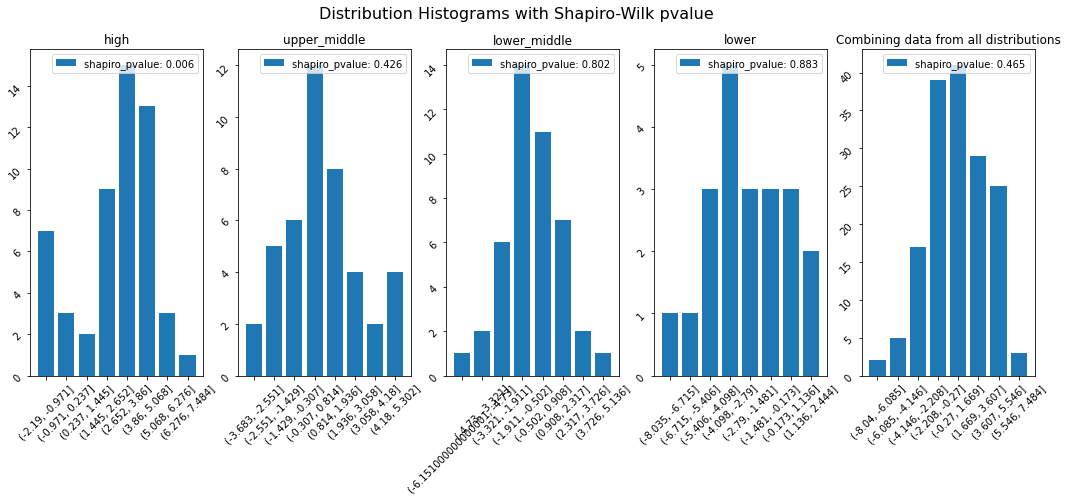

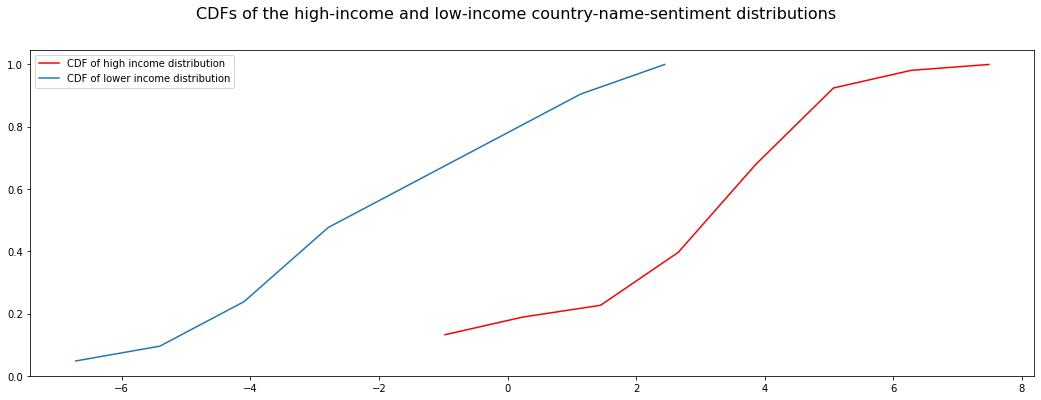

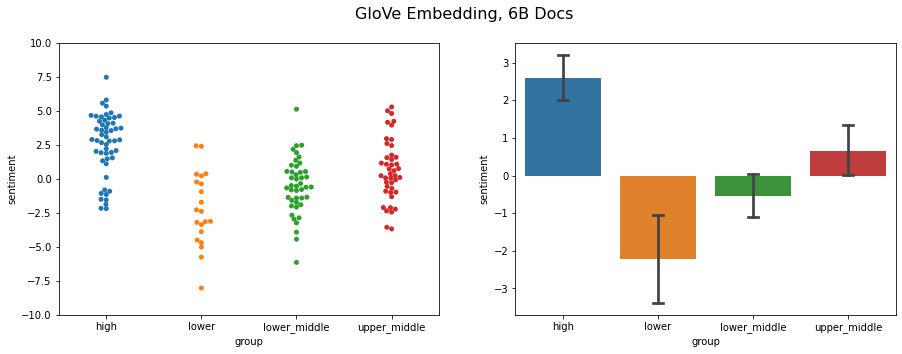

In [ ]:
# retrain_model(load_embeddings(base_dir + 'Embeddings/glove.6B.300d.txt'), "economic_designations", title='GloVe Embedding, 6B Docs')
country_sentiments = retrain_model(glove_6b, "economic_designations", title='GloVe Embedding, 6B Docs', verbose=1)

## Experiment 2 (Glove 840B)

Embedding Loaded
Beginning training
Done Training
Accuracy of sentiment: 96.37%

-------------------------------- LABELS THAT DO NOT EXIST --------------------------------

high country Isle_of_Man did not exist in embedding
high country Channel_Islands did not exist in embedding
high country Cayman_Islands did not exist in embedding
high country United_Arab_Emirates did not exist in embedding
high country South_Korea did not exist in embedding
high country Sint_Maarten did not exist in embedding
high country Czech_Republic did not exist in embedding
high country Turks_and_Caicos_Islands did not exist in embedding
high country Saudi_Arabia did not exist in embedding
high country Saint_Kitts_and_Nevis did not exist in embedding
high country French_Polynesia did not exist in embedding
high country Trinidad_and_Tobago did not exist in embedding
high country Antigua_and_Barbuda did not exist in embedding
high country New_Caledonia did not exist in embedding
upper_middle country Costa_Rica 

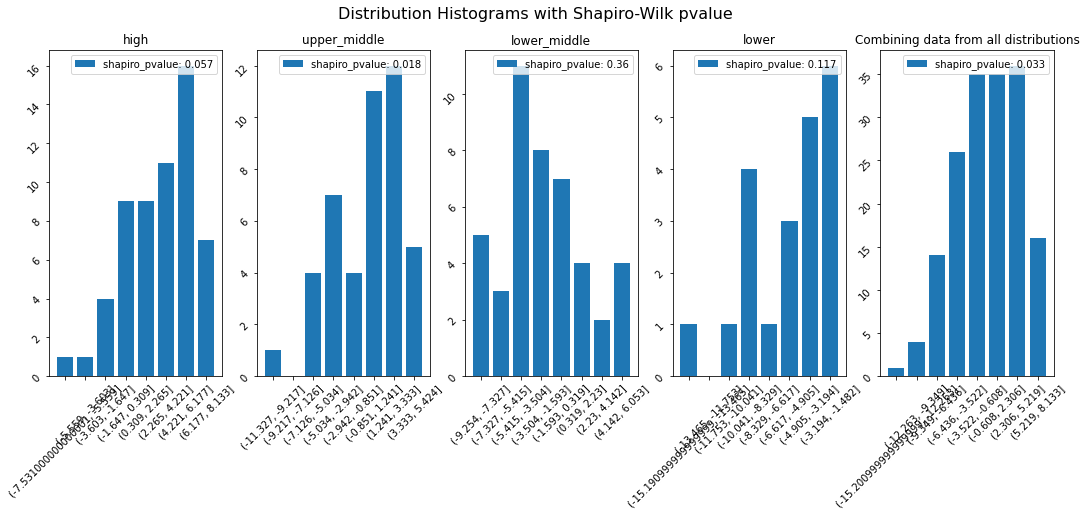

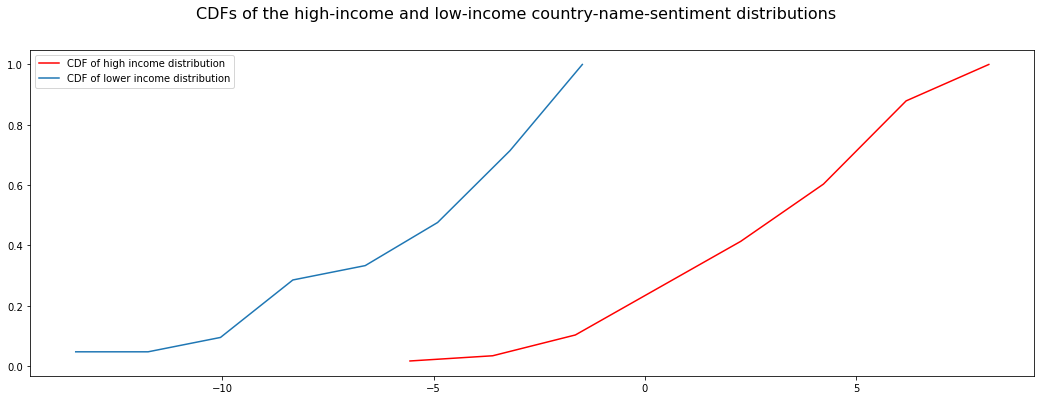

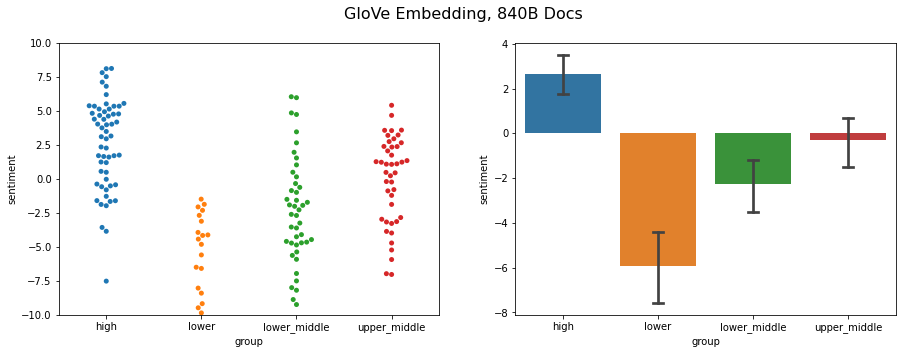

In [ ]:
# retrain_model(load_embeddings(base_dir + 'Embeddings/glove.840B.300d.txt'), "economic_designations", title='GloVe Embedding, 840B Docs')
retrain_model(glove_840b, "economic_designations", title='GloVe Embedding, 840B Docs', verbose=1)

## Experiments 1 & 2 Results
### Experiment 1 Results
**Missing Data**
<br>
We want to note that there were several multi-word countries which did not exist in the embeddings, including some notable ones like the United States and United Kingdom. This simply means that our results for experiment 1 may not be as reliable given that some countries are not represented.

**Visual Inspection:**
<br>
The visual differences in the distributions are pretty clear (shown in GloVe Embedding, 6B Docs Figure). You can tell that the sentiment gradually increases as you go from lower income countries to higher income countries. The differences are arguably clear enough that a statistical test isn't needed.


**ANOVA Test Assumptions**:
<br>
We see that testing for ANOVA test assumption 1 proves that each of the country-sentiment population distriubtions are normal except for the high-income distribution. Because the ANOVA test is fairly robust to violations of this assumption, and the majority of the distributions are normal we decide that it shouldn't impact our ability to continue with the ANOVA test [[9]](https://www.statology.org/anova-assumptions/)


For assumption 2 the Brown-Forsynth test fails to reject the null hypothesis that the distribution variances are equal. This satisifies assumption 2 of the ANOVA Test


**Statistical Test Results**
<br>
The ANOVA Test and Kolmogorov-Smirnov tests both reject their null hypotheses which, after looking at the plots, is no surprise. This means that all the distributions are statistically different in the case of the ANOVA Test and the high-income and low-income distributions are statisically different with regards to the Kolmogorov-Smirnov test.


### Experiment 2 Results
**Visual Inspection:**
<br>
The figure "GloVe Embedding, 840B Docs, shows a crystal clear difference in the high-income and low-income country-name-sentiment distributions. The lower-middle and upper-middle are more spread out. However, the sentiments of the lower-middle seem to be clustered more toward negative and the sentiments of the upper-middel clustered more toward positive.


We probably don't even need a statistical test here to say that these distributions are different, especially with regards to the low-income and high-income distributions. However, we will still attempt them to further support our visual observations.


Note: that a lot fewer countries DNE with this embedding.


**ANOVA Test Assumptions**:
<br>
For ANOVA test assumption 1, it is not very clear from the histograms in the Glove-840b experiment histograms that the "population" distributions are normal. However, for every distribution except the upper-middle-income distriubtion the Shapiro-Wilk test does suggest that the distributions are normal. Under the same logic used in the discussion of experiment 1, we say that assumption 1 is satisified given that the ANOVA test is fairly robust against violations of normality.


For assumption 2 of the ANOVA test, the condition is satisifed by the Brown-Forsynth test


**Statistical Test Results**
<br>
The ANOVA Test and Kolmogorov-Smirnov tests both reject their null hypotheses. This means that all the distributions are statistically different in the case of the ANOVA Test and the high-income and low-income distributions are statisically different with regards to the Kolmogorov-Smirnov test.


## Discussion of Experiments 1 & 2 and Research Question 1
Visual and statistical results from experiments 1 and 2 provide us with clear evidence that supports our hypothesis to research question 1 that the GloVe embeddings do contain sentiment bias toward the names of countries from different economic income categories. Furthermore, experiments 1 and 2 support the hypothesis that the names of countries from the low-income category would have a more negative sentiment, and the names of countries from the high-income category would have a more positive sentiment.

While it's possible our statistical results are biased by the steps we took to satisfy the statistical test asumptions, the visual inspection clearly supports our hypothesis.

Now we move on to Experiment 3 to test our hypothesis for research qustion 2.

## Experiment 3 (ConceptNet Numberbatch)

Embedding Loaded
Beginning training
Done Training
Accuracy of sentiment: 96.84%

-------------------------------- LABELS THAT DO NOT EXIST --------------------------------

high country Turks_and_Caicos_Islands did not exist in embedding
high country Saint_Kitts_and_Nevis did not exist in embedding
upper_middle country Saint_Vincent_and_the_Grenadines did not exist in embedding
lower_middle country Federated_States_of_Micronesia did not exist in embedding
lower_middle country Sao_Tome_and_Principe did not exist in embedding
lower_middle country Timor-Leste did not exist in embedding
lower_middle country Republic_of_the_Congo did not exist in embedding
lower country The_Gambia did not exist in embedding
lower country Guinea-Bissau did not exist in embedding
lower country Democratic_Republic_of_the_Congo did not exist in embedding


-------------------------------- ASSUMPTIONS FOR ANOVA TEST --------------------------------


-------------------------------- ASSUMPTION 1: DATA COMES FROM

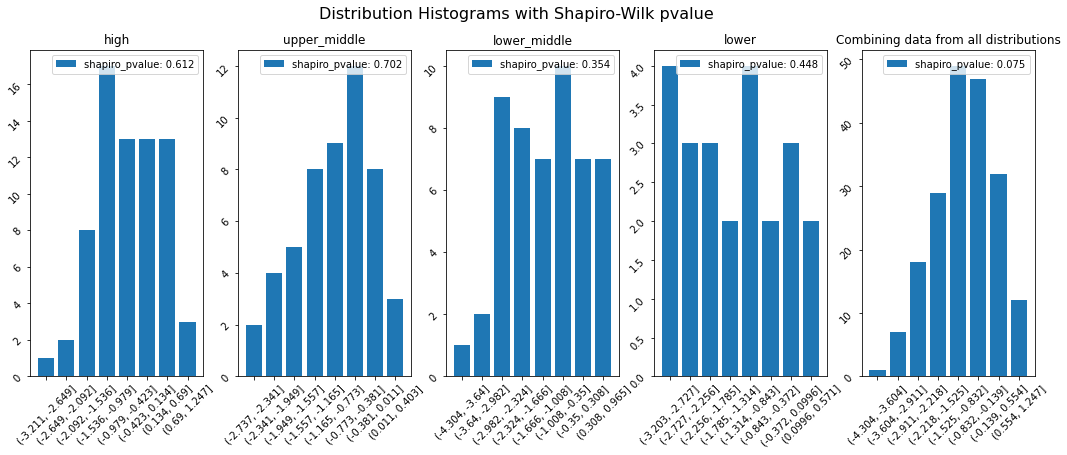

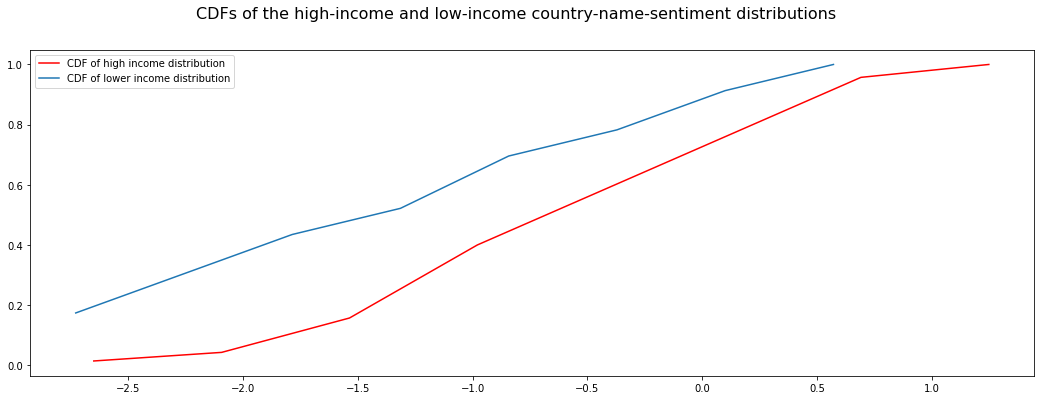

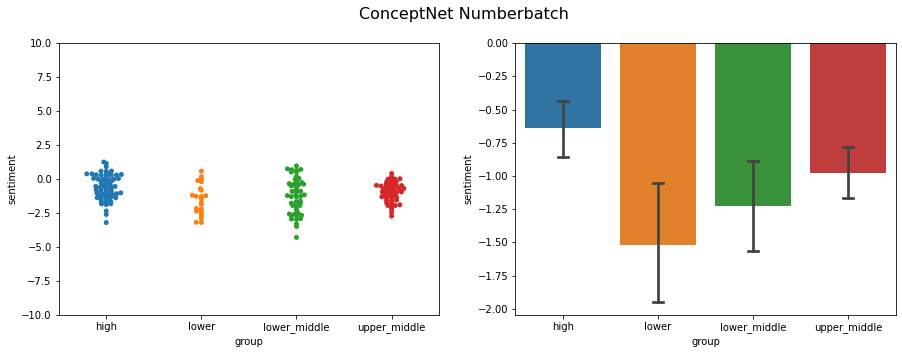

In [ ]:
retrain_model(conceptnet, "economic_designations", title='ConceptNet Numberbatch', verbose=1)

## Experiment 3 Results
First an interesting note:
- Very few countries do not exist in ConceptNet Numberbatch. This means that our results may be even more reliable because the overwhelming majority of countries are represented in the experiment.


**Visual Inspections**
Wow, from the swarm plots the differences between the distributions are much less clear. They are all fairly similar and all slightly negative. While differences do exist, it's hard to say visually whether or not the differences are significant. The bar plots on the other hand do seem to show the differences more clearly, but the spread is much more tight than it was in experiments 1 and 2.


**ANOVA Test Assumptions**
The distribution histograms and Shapiro-Wilk Test results show unequivocal evidence that assumption 1 of the ANOVA test is satisfied. The Brown-Fosynth test rejects the null hypothesis that the variances are equal. Despite this, the largest variance is not larger than 4 times the smallest variance, in which case a rejection of the null hypothesis that the variances are not equal is acceptable because the one_way ANOVA test is "robust to unequal variances" [[18]](https://www.statology.org/brown-forsythe-test-in-python).

We assume that both assumptions 1 and 2 of the ANOVA test are satisified.


**Statistical Test Results**
The ANOVA Test and Kolmogorov-Smirnov both reject their null hypotheses. Therefore, the ANOVA test results give statistical evidence that the country-name-sentiment distributions are in fact still statistically different when using the ConceptNet Numberbatch to generate the country-name-vectors. Furthermore, the Kolmogorov-Smirnov test shows evidence that the high-income and low-income country-name-sentiment distributions are still statistically different.


## Discussion of Experiment 3 and Research Question 2
The results from Experiment 3 indicate that our hypothesis for research question 2 *may not* be supported by our results. Visual and statistical results do indicate that Country-name sentiment bias still exists when using ConceptNet Numberbatch as the embedding of choice. However, we say "may not" above because while ConceptNet did not completely remove the sentiment-bias, an argument could be made that it did reduce it. No longer is there this huge disparity between the sentiment distribution of the names of the higher and lower income countries where higher income countries have a more positive sentiment and lower income countries have a more negative sentiment. The CDFs help to further demonstrate the more similar distributions when compared to the CDFs in experiments 1 and 2. The disparity, while it still exists, is now much closer and more consistently negative among all distributions.


Ultimately, we don't feel comfortable enough in this argument to say that our hypothesis is supported, but with more evidence and a better definition of "mitigation" in our hypothesis, it's possible that the hypothesis could be proven in future work.

# 8. Conclusions
To reiterate:
- For research question 1, our hypothesis was supported by the results. Sentiment bias does exist in the GloVe embeddings such that the names of countries with lower economic income rankings are associated with more negative sentiment values and countries with higher economic income rankings are associated with more positive sentiments.

- For research question 2, our hypothesis is not supported by the results. While it's possible that ConceptNet Numberbatch may have less sentiment bias than GloVe embeddings in the application of country names, it still contains a statistically significant amount of sentiment bias.

Our chief conclusion is this:
- Sentiment bias associated with the names of countries of varying economic income levels does exist in large text embeddings. We are not currently aware of a silver bullet to fix the issue at hand. While not perfect, ConceptNet Numberbatch could be the best option when selecting a large text embedding to use in a machine learning problem. However, researchers and developers should be aware of the sentiment bias we have exposed so that the limitations of current methods are properly disclosed and deterimental downsteam impacts can be contained. Additionally, knowledge of this sentiment bias can motivate further invesetigation of new methods to mitigate this bias in the future.


Future Work:
- Further investigate and quanitify the level of sentiment bias reduction when using ConceptNet Numberbatch with this dataset.
- Further investigate items discussed below appendix section
- Explore other machine learning methods for the classifier section of the work.

Limitations of conclusions:
- As previously discussed, the conclusions we make with regards to the statistical tests may be biased by the fact that we do not perfectly meet the assumptions of the statistical tests employed in this project.

# 9. Conferences / Journals

***AI and Ethics:***

A journal that focuses on the policies, ethical and regulatory that might arise due to the progress of Artificial intelligence. It focuses on the developement of AI technology and where it fits into the future of the public and industries. The main goal is to focus on the risks and benefits as well as social implications might arise from the integration of AI.

***FAccT: Fairness, Accountability, and Transparency Conference:***

The FAccT conference is an interdisciplinary conference that evaluates the Algorithmic systems that are developed and deployed in a number of ways that are used to shape the "human experience". The conference focuses on systems that appear to have benefits but also have potential and inherent risks that could impact social economic systems.



# 10. Bibliography
1.   Country Dataset: https://worldpopulationreview.com/country-rankings/low-income-countries
2.   Lexicon: https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
3. GloVe: https://github.com/stanfordnlp/GloVe
4. ConceptNet: https://github.com/commonsense/conceptnet-numberbatch
5. https://www.investopedia.com/terms/g/gross-national-income-gni.asp
6. https://en.wikipedia.org/wiki/List_of_countries_by_GNI_(nominal)_per_capita
7. https://data.worldbank.org/indicator/ny.gnp.pcap.cd?year_high_desc=true
8. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
9. https://www.statology.org/anova-assumptions/
10. https://online.stat.psu.edu/stat500/lesson/10/10.2/10.2.1
11. https://towardsdatascience.com/how-to-compare-two-or-more-distributions-9b06ee4d30bf
12. https://towardsdatascience.com/kolmogorov-smirnov-test-84c92fb4158d
13. https://influentialpoints.com/Training/kolmogorov-smirnov_test-principles-properties-assumptions.htm
14. https://towardsdatascience.com/a-practical-introduction-to-the-shapiro-wilk-test-for-normality-5675e52cee8f
15. https://www.statology.org/brown-forsythe-test-in-python/
16. https://www.geeksforgeeks.org/how-to-perform-a-brown-forsythe-test-in-python/
17. https://en.wikipedia.org/wiki/Brown–Forsythe_test
18. https://www.statology.org/brown-forsythe-test-in-python



# 11. Appendix & Future Work
As we're sure you can tell by now, we been trying to be extremely thorough in terms of our writeup and investigation, maybe even too thorough. At this point we're running out of time. However, there's still some cool stuff that we looked at which we want to share. So we decided to put in an appendix with the disclaimer that these are not thorough investigations or experiments so if you do grade it, please don't grade this too harshly. These are just some other angles and questions we looked at and could be the subject of further research in the future.


We briefly looked at two additional questions:
- Is there sentiment bias when names of countries are grouped based on their historical military and political relationship to the United States and the West. We grouped countries into three groups.

>> 1) Soviet era Communist Countries.<br>
>> 2) Middle Eastern Countries in which the U.S. has conducted or supported counter-terrorism efforts over the past few decades<br>
>> 3) NATO countries pre-1990.

- In class we showed that ConceptNet mitigated sentiment bias toward different names grouped by ethnicity. We wondered if in the process of ConceptNet mitigating this bias, if it loses some historical context surrounding historically important names. We looked at several different groupings of historically important names, but the most interesting was Soviet leaders.

## 11.1 Military Alliances
DATA:
-     nato_pre_1990 = ["belgium", "canada", "denmark", "france", "germany", "greece", "iceland", "italy", "luxembourg", "netherlands", "norway", "portugal", "spain", "turkey", "united_kingdom", "united_states"]
- communists = ["soviet", "cuba", "romania", "poland", "hungary", "czechoslovakia", "bulgaria", "albania", "vietnam", "china"]
- war_on_terror = ["afghanistan", "iraq", "iran", "syria", "lebanon", "yemen", "somalia"]

CODE:
- The code to generate these figures was removed from the above functions to clean up the main lab report. These figures and print outs were generated prior to that cleanup. The F-Statistic and P-Value shown are for the ANOVA Test, we don't perform any evaluation of whether or not we meet the ANOVA assumptions, so we will be relying more on visual observation.

## Glove 6B

Embedding Loaded
Beginning training
Done Training
Accuracy of sentiment: 91.99%
nato_pre_1990 country united_kingdom did not exist in embedding
nato_pre_1990 country united_states did not exist in embedding
F-statistic: 21.705402016621505  With P-value: 2.030100404043343e-06


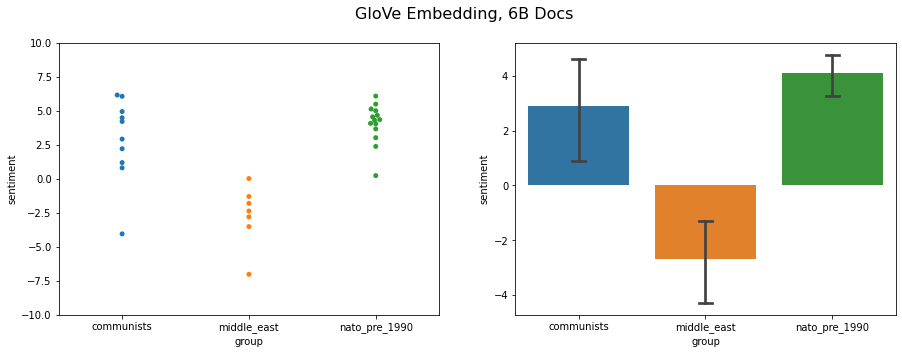

In [ ]:
retrain_model(glove_6b, "military_alliances", title='GloVe Embedding, 6B Docs')

## Glove 840b

Embedding Loaded
Beginning training
Done Training
Accuracy of sentiment: 95.32%
F-statistic: 10.761578110130424  With P-value: 0.0002997656952027242


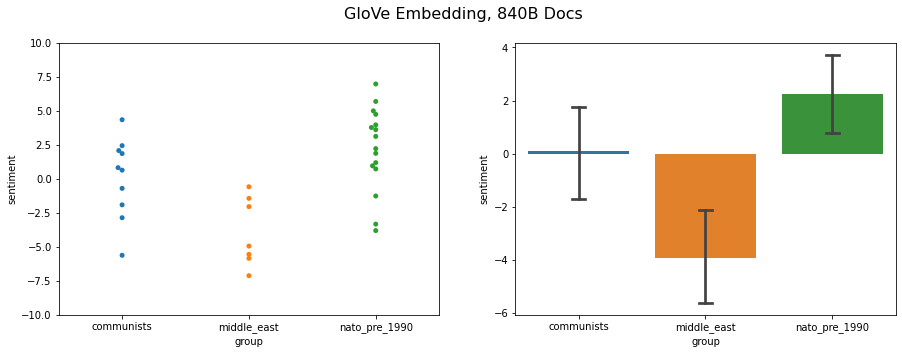

In [ ]:
retrain_model(glove_840b, "military_alliances", title='GloVe Embedding, 840B Docs')

## ConceptNet

Embedding Loaded
Beginning training
Done Training
Accuracy of sentiment: 97.47%
F-statistic: 29.591621860451625  With P-value: 7.990424599458315e-08


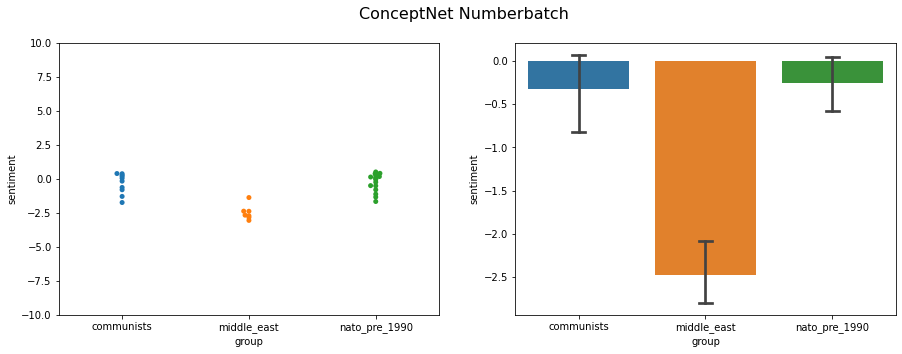

In [ ]:
retrain_model(conceptnet, "military_alliances", title='ConceptNet Numberbatch')

## 11.1 Discussion
- The distributions are seemingly different for every embedding
- Negative sentiment bias toward middle eastern countries most definitely exists in every embedding
- In both GloVe embeddings the NATO countries seem to have the most postive sentiment
- The communist countries in both GloVe embeddings have a wide range of sentiments but on average they seem like when they are positive, they aren't quite as positive as the NATO countries.


These results really showcase the limitation that we mention in the second paragraph of our overview where we said our primary lab investigation would not determine whether or not sentiment bias was caused due to economic status. This result demonstrates that the sentiment bias could be contributed to by the fact that certain countries in lower economic categories have historically been political or military enemies of the West.

## 11.2 Historical Context for Soviet Leaders
Big disclaimer here: We have no idea at what frequency these Soviet era names occur in the datasets used to generate the large text embeddings and whether or not these occurences are benign or not. Meaning we do not really know if when we give the name of someone like "stalin" to a word embedding are we receiving a word vector representing the Stalin who presided over the Soviet Union and killed millions of his own citizens, or are we grabbing a word vector that includes references to anyone on the internet with the name Stalin. We just don't know. But for the purposes of this experiment we will assume that when we input the name of a Soviet leader we are receiving a word vector that represents them.

In [ ]:
# Glove-840b
soviet_leaders = ["Stalin", "Khrushchev", "Brezhnev", "Andropov", "Chernenko", "Gorbachev"]

for pres in soviet_leaders:
    print("president: ", pres)

    print("sentiment word: ", words_to_sentiment([pres]))
    print()

president:  Stalin
sentiment word:          sentiment
Stalin  -7.390884

president:  Khrushchev
sentiment word:              sentiment
Khrushchev  -8.870275

president:  Brezhnev
sentiment word:            sentiment
Brezhnev  -6.831995

president:  Andropov
sentiment word:            sentiment
Andropov  -3.533657

president:  Chernenko
sentiment word:             sentiment
Chernenko   -5.61783

president:  Gorbachev
sentiment word:             sentiment
Gorbachev  -1.495502



In [ ]:
# ConceptNet Numberbatch
soviet_leaders = ["stalin", "khrushchev", "brezhnev", "andropov", "gorbachev"] # not as many existed in ConceptNet

for pres in soviet_leaders:
    print(words_to_sentiment([pres]))

        sentiment
stalin  -1.114401
            sentiment
khrushchev  -1.575842
          sentiment
brezhnev  -1.983083
          sentiment
andropov  -0.770955
           sentiment
gorbachev  -1.148739


## 11.2 Discussion
First let us say that we are taking a Western viewpoint to our observations.


With that said, we feel that it's pretty agreed upon that Stalin was a really bad guy. From famine, to war, to political persecution, he killed tens of millions of his own people. On the opposite side of the spectrum was Gorbachev, who warmed relations with the West and presided over the Soviet Union during its dissolution. Through our western eyes, we would say Gorbachev was a pretty good guy.


A SGDClassifier trained using vectors generated via GloVe-840b gives **Stalin** a pretty negative sentiment value of **-7.39**. It gives **Gorbachev** a value of **-1.495**.


The sentiment value produced with SGDClassifier trained on ConceptNet vectors gives **Stalin** a sentiment value of **-1.114** and **Gorbachev** a value of **-1.148**


GloVe-840b seems to have a pretty good idea that Stalin was worse than Gorbachev. ConceptNet seems to not be so sure, rating Gorbachev slightly more negative than Stalin.


This is a single observation, not a really well thought out argument. However, it does provide a potential inspiration for future research regarding whether or not historical context is stripped way in the process of mitigating bias in datasets / models.